In [196]:
pip install --upgrade mysql-connector-python

   ---------------------------------------- 0.0/16.1 MB ? eta -:--:--
   ------ --------------------------------- 2.6/16.1 MB 13.7 MB/s eta 0:00:01
   ---------------- ----------------------- 6.6/16.1 MB 16.1 MB/s eta 0:00:01
   ---------------------- ----------------- 9.2/16.1 MB 15.0 MB/s eta 0:00:01
   ---------------------------- ----------- 11.5/16.1 MB 14.4 MB/s eta 0:00:01
   ----------------------------------- ---- 14.4/16.1 MB 13.9 MB/s eta 0:00:01
   ---------------------------------------- 16.1/16.1 MB 13.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
import matplotlib.pyplot as plt
import pymysql
import pandas as pd
import numpy as np
import mysql.connector

In [27]:
from IPython.display import display

In [3]:
db_config = {
    "host": "localhost, 3306",
    "user": "root",
    "password": "Simr@n00",
    "database": "sales"

}

In [7]:
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="Simr@n00",
    database="sales",
    auth_plugin="mysql_native_password"  # Add this line
)


In [21]:
import mysql.connector
import pandas as pd

# Define database connection details QUESTION 1
db_config = {
    "host": "localhost",  # Corrected hostname
    "user": "root",
    "password": "Simr@n00",
    "database": "sales"
}

# Define queries
queries = {
    "Top 5 Products by Sales in 2022": """
        WITH ProductSales AS (
    SELECT 
        sd.sku_name, 
        sd.category, 
        SUM(od.qty_ordered) AS total_sales
    FROM sales.order_detail od
    JOIN sales.sku_detail sd ON od.sku_id = sd.id  -- Join to get product names and categories
    WHERE 
        sd.category = 'Mobiles & Tablets'  -- Filter only "Mobiles & Tablets" category
        AND YEAR(od.order_date) = 2022  -- Filter orders from 2022
        AND od.is_valid = 1  -- Consider only valid orders
    GROUP BY sd.sku_name, sd.category
)
SELECT 
    sku_name, 
    total_sales
FROM ProductSales
ORDER BY total_sales DESC
LIMIT 5;
    """
}

# Connect to MySQL Database
try:
    connection = mysql.connector.connect(**db_config)
    print("Database connection successful!")

    for question, query in queries.items():
        print(f"\n---{question}---")
        df = pd.read_sql(query, connection)  # Use `read_sql`
        print(df)  # Print the dataframe

except Exception as e:
    print(f"An error occurred: {e}")

finally:
    if 'connection' in locals() and connection.is_connected():
        connection.close()
        print("Database connection closed.")

Database connection successful!

---Top 5 Products by Sales in 2022---
                          sku_name  total_sales
0               IDROID_BALRX7-Gold       1000.0
1         IDROID_BALRX7-Jet black          31.0
2               Infinix Hot 4-Gold         15.0
3   samsung_Grand Prime Plus-Black         11.0
4  samsung_Grand Prime Plus-Silver         10.0
Database connection closed.


C:\Users\Simran\AppData\Local\Temp\ipykernel_7320\3546010598.py:44: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)  # Use `read_sql`


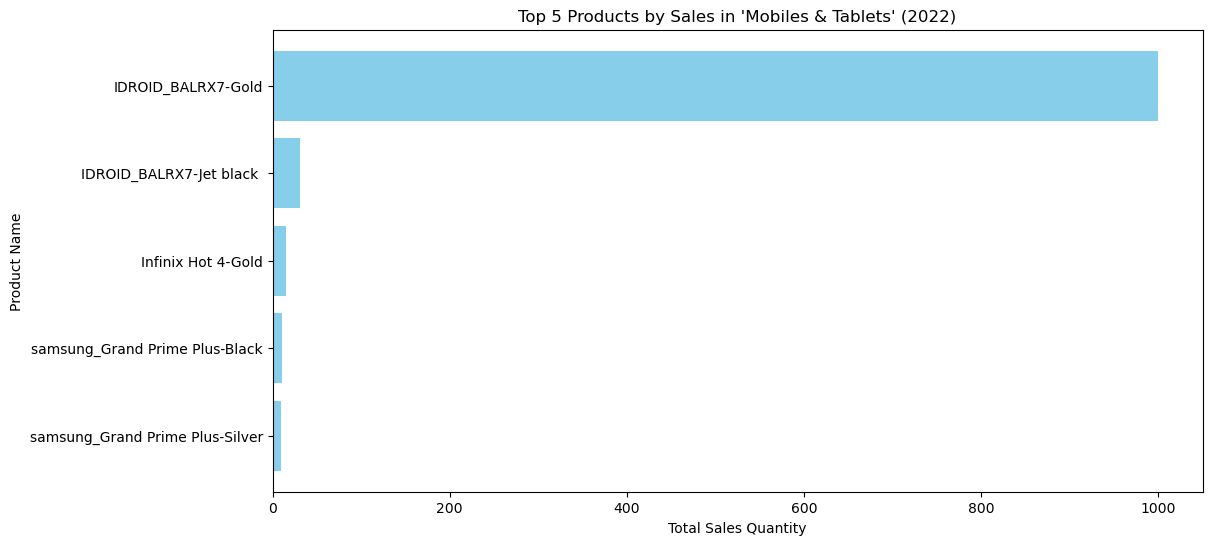

In [25]:
import matplotlib.pyplot as plt
import mysql.connector

# Connect to MySQL Database
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="Simr@n00",
    database="sales"
)
cursor = conn.cursor()

# Execute Query
query = """
    WITH ProductSales AS (
        SELECT 
            sd.sku_name, 
            SUM(od.qty_ordered) AS total_sales
        FROM order_detail od
        JOIN sku_detail sd ON od.sku_id = sd.id
        WHERE 
            sd.category = 'Mobiles & Tablets'
            AND YEAR(od.order_date) = 2022
            AND od.is_valid = 1
        GROUP BY sd.sku_name
    )
    SELECT sku_name, total_sales
    FROM ProductSales
    ORDER BY total_sales DESC
    LIMIT 5;
"""
cursor.execute(query)
data = cursor.fetchall()

# Extract data
products = [row[0] for row in data]
sales = [row[1] for row in data]

# Plot Horizontal Bar Chart
plt.figure(figsize=(12, 6))
plt.barh(products, sales, color='skyblue')
plt.xlabel("Total Sales Quantity")
plt.ylabel("Product Name")
plt.title("Top 5 Products by Sales in 'Mobiles & Tablets' (2022)")
plt.gca().invert_yaxis()  # Highest sales on top
plt.show()

# Close connection
cursor.close()
conn.close()


In [9]:
import mysql.connector
import pandas as pd

# Define database connection details
db_config = {
    "host": "localhost",  # Corrected hostname
    "user": "root",
    "password": "Simr@n00",
    "database": "sales"
}

# Define queries QUESTION 2
queries = {
    "Monthly Sales Growth": """
        WITH MonthlySales AS (
            SELECT 
                DATE_FORMAT(order_date, '%Y-%m') AS month, 
                SUM(after_discount) AS total_sales,
                SUM(before_discount) AS total_before_discount,
                SUM(discount_amount) AS total_discount
            FROM sales.order_detail
            WHERE is_valid = 1
            GROUP BY month
        ),
        SalesGrowth AS (
            SELECT 
                curr.month, 
                curr.total_sales AS current_month_sales,
                prev.total_sales AS previous_month_sales,
                (curr.total_sales - prev.total_sales) / prev.total_sales AS sales_growth,
                (curr.total_discount / curr.total_before_discount) AS avg_discount_rate
            FROM MonthlySales curr
            LEFT JOIN MonthlySales prev 
                ON DATE_FORMAT(DATE_SUB(STR_TO_DATE(curr.month, '%Y-%m'), INTERVAL 1 MONTH), '%Y-%m') = prev.month
        )
        SELECT month, sales_growth, avg_discount_rate
        FROM SalesGrowth
        ORDER BY month;
    """
}

# Connect to MySQL Database
try:
    connection = mysql.connector.connect(**db_config)
    print("Database connection successful!")

    for question, query in queries.items():
        print(f"\n---{question}---")
        df = pd.read_sql(query, connection)  # Use `read_sql`
        print(df)  # Print the dataframe

except Exception as e:
    print(f"An error occurred: {e}")

finally:
    if 'connection' in locals() and connection.is_connected():
        connection.close()
        print("Database connection closed.")


Database connection successful!

---Monthly Sales Growth---
      month sales_growth  avg_discount_rate
0   2021-01         None           0.000000
1   2021-02         None           0.000000
2   2021-03         None           0.000490
3   2021-04         None           0.000000
4   2021-05         None           0.000861
5   2021-06         None           0.001519
6   2021-07         None           0.000662
7   2021-08         None           0.000000
8   2021-09         None           0.004190
9   2021-10         None           0.000140
10  2021-11         None           0.038547
11  2021-12         None           0.000027
12  2022-01         None           0.001277
13  2022-02         None           0.000747
14  2022-03         None           0.001791
15  2022-04         None           0.003179
16  2022-05         None           0.004266
17  2022-06         None           0.007506
18  2022-07         None           0.005171
19  2022-08         None           0.002753
20  2022-09     

C:\Users\Simran\AppData\Local\Temp\ipykernel_7320\3088995010.py:49: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)  # Use `read_sql`


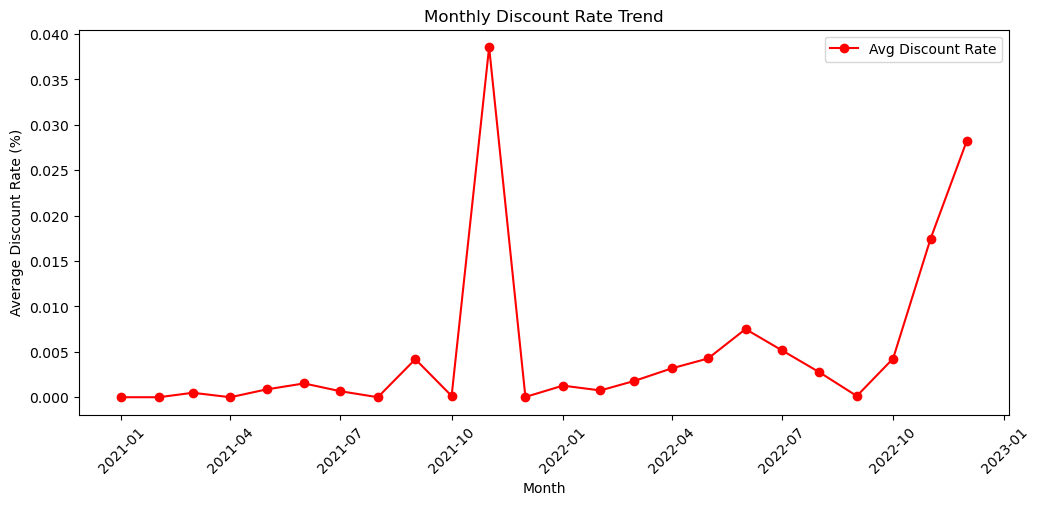

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating DataFrame with given data
data = {
    "month": [
        "2021-01", "2021-02", "2021-03", "2021-04", "2021-05", "2021-06", "2021-07", "2021-08",
        "2021-09", "2021-10", "2021-11", "2021-12", "2022-01", "2022-02", "2022-03", "2022-04",
        "2022-05", "2022-06", "2022-07", "2022-08", "2022-09", "2022-10", "2022-11", "2022-12"
    ],
    "sales_growth": [None] * 24,  # Sales growth is None for all months
    "avg_discount_rate": [
        0.000000, 0.000000, 0.000490, 0.000000, 0.000861, 0.001519, 0.000662, 0.000000,
        0.004190, 0.000140, 0.038547, 0.000027, 0.001277, 0.000747, 0.001791, 0.003179,
        0.004266, 0.007506, 0.005171, 0.002753, 0.000134, 0.004258, 0.017462, 0.028258
    ]
}

df = pd.DataFrame(data)

# Convert month to datetime format for proper plotting
df["month"] = pd.to_datetime(df["month"])

# Create figure
fig, ax = plt.subplots(figsize=(12, 5))

# Plot Discount Rate as a Line Chart
ax.plot(df["month"], df["avg_discount_rate"], color='red', marker='o', linestyle='-', label="Avg Discount Rate")

# Labels & Titles
ax.set_xlabel("Month")
ax.set_ylabel("Average Discount Rate (%)")
ax.set_title("Monthly Discount Rate Trend")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
ax.legend()

# Show Plot
plt.show()
